In [3]:
pip install numpy pandas matplotlib seaborn 



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load the dataset
file_path = "../data/life-expectancy-vs-health-expenditure.csv"  # Adjust the file path as necessary
data = pd.read_csv(file_path)

# Display the first few rows to inspect the dataset
print("Dataset preview:")
print(data.head())


Dataset preview:
        Entity      Code  Year  Life expectancy at birth, total (years)  \
0     Abkhazia  OWID_ABK  2015                                      NaN   
1  Afghanistan       AFG  1960                                32.445999   
2  Afghanistan       AFG  1961                                32.962002   
3  Afghanistan       AFG  1962                                33.471001   
4  Afghanistan       AFG  1963                                33.971001   

  Health Expenditure and Financing (per capita) (OECDstat (2017))  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

   Population (historical estimates) Continent  
0                                NaN      Asia  
1                  

In [4]:
# Check column names
print("\nColumns in the dataset:")
print(data.columns)

# Rename columns for consistency
data.rename(columns=lambda x: x.strip().lower().replace(' ', '_').replace(',', ''), inplace=True)

# Display updated column names
print("\nUpdated column names:")
print(data.columns)



Columns in the dataset:
Index(['Entity', 'Code', 'Year', 'Life expectancy at birth, total (years)',
       'Health Expenditure and Financing (per capita) (OECDstat (2017))',
       'Population (historical estimates)', 'Continent'],
      dtype='object')

Updated column names:
Index(['entity', 'code', 'year', 'life_expectancy_at_birth_total_(years)',
       'health_expenditure_and_financing_(per_capita)_(oecdstat_(2017))',
       'population_(historical_estimates)', 'continent'],
      dtype='object')


In [5]:
# Display basic dataset information
print("\nDataset information:")
print(data.info())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56629 entries, 0 to 56628
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   entity                                                           56629 non-null  object 
 1   code                                                             54118 non-null  object 
 2   year                                                             56629 non-null  int64  
 3   life_expectancy_at_birth_total_(years)                           12845 non-null  float64
 4   health_expenditure_and_financing_(per_capita)_(oecdstat_(2017))  1610 non-null   object 
 5   population_(historical_estimates)                                55656 non-null  float64
 6   continent                                                        285 non-null    object 
dtypes: float64(2), int6

In [6]:
# Group by 'entity' and calculate min/max for 'life_expectancy_at_birth_total_years'
if 'life_expectancy_at_birth_total_(years)' in data.columns:
    print("\nMin and Max values of 'Life Expectancy at Birth (Years)' by Entity:")
    print(data.groupby('entity')['life_expectancy_at_birth_total_(years)'].agg(['min', 'max']))
else:
    print("\nColumn 'life_expectancy_at_birth_total_years' not found in the dataset.")



Min and Max values of 'Life Expectancy at Birth (Years)' by Entity:
                             min        max
entity                                     
Abkhazia                     NaN        NaN
Afghanistan            32.445999  65.172997
Africa                       NaN        NaN
Akrotiri and Dhekelia        NaN        NaN
Albania                62.283001  78.685997
...                          ...        ...
Yugoslavia                   NaN        NaN
Zambia                 43.412998  64.194000
Zanzibar                     NaN        NaN
Zimbabwe               43.064999  61.737999
Åland Islands                NaN        NaN

[308 rows x 2 columns]


In [7]:
# Statistical summary for numerical columns
print("\nStatistical summary of numerical columns:")
print(data.describe())



Statistical summary of numerical columns:
               year  life_expectancy_at_birth_total_(years)  \
count  56629.000000                            12845.000000   
mean    1610.541913                               64.459347   
std     1405.286305                               11.346860   
min   -10000.000000                               18.907000   
25%     1833.000000                               56.743320   
50%     1902.000000                               67.548759   
75%     1967.000000                               72.966003   
max     2021.000000                               85.387802   

       population_(historical_estimates)  
count                       5.565600e+04  
mean                        3.246352e+07  
std                         2.503028e+08  
min                         1.000000e+00  
25%                         1.338740e+05  
50%                         1.218570e+06  
75%                         5.396250e+06  
max                         7.874966e+09  


In [8]:
# Fill missing values in 'continent' with 'Unknown'
data['continent'] = data['continent'].fillna('Unknown')
print("\nFilled missing values in 'continent' column with 'Unknown'.")



Filled missing values in 'continent' column with 'Unknown'.


In [9]:
# Save the cleaned dataset
output_file_path = "../data/Cleaned_LifeExpectancy.csv"
data.to_csv(output_file_path, index=False)
print(f"\nCleaned dataset saved to: {output_file_path}")



Cleaned dataset saved to: ../data/Cleaned_LifeExpectancy.csv


Visualization saved as '../visuals/LifeExpectancy_Trend_France.png'


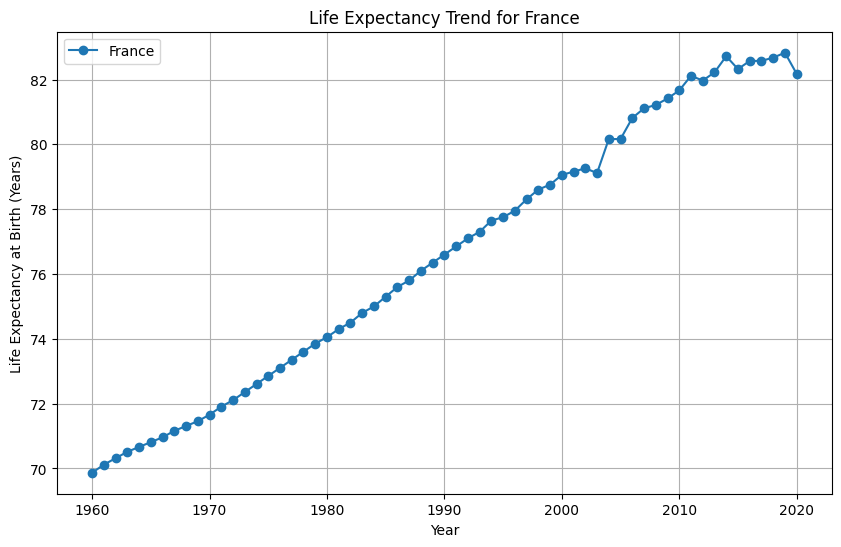

In [10]:
# Visualization Example: Life Expectancy Trend over Years for a Specific Entity
entity_name = "France"
entity_data = data[data['entity'] == entity_name]

if not entity_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(entity_data['year'], entity_data['life_expectancy_at_birth_total_(years)'], marker='o', label=entity_name)
    plt.title(f"Life Expectancy Trend for {entity_name}")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy at Birth (Years)")
    plt.legend()
    plt.grid(True)
    plt.savefig("../visuals/LifeExpectancy_Trend_France.png")
    print(f"Visualization saved as '../visuals/LifeExpectancy_Trend_France.png'")
    plt.show()
else:
    print(f"\nNo data found for the entity: {entity_name}")


Visualization saved as '../visuals/LifeExpectancy_Trend_Australia.png'


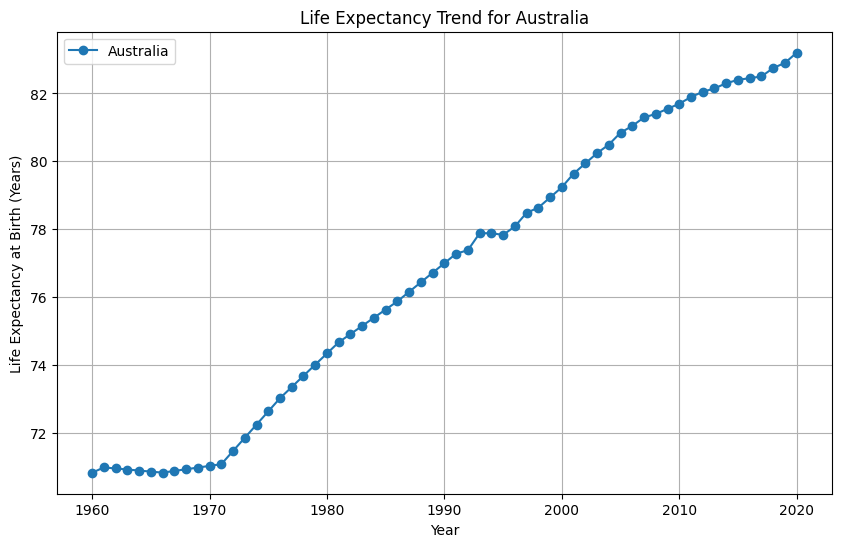

In [11]:
# Visualization Example: Life Expectancy Trend over Years for a Specific Entity
entity_name = "Australia"
entity_data = data[data['entity'] == entity_name]

if not entity_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(entity_data['year'], entity_data['life_expectancy_at_birth_total_(years)'], marker='o', label=entity_name)
    plt.title(f"Life Expectancy Trend for {entity_name}")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy at Birth (Years)")
    plt.legend()
    plt.grid(True)
    plt.savefig("../visuals/LifeExpectancy_Trend_Australia.png")
    print(f"Visualization saved as '../visuals/LifeExpectancy_Trend_Australia.png'")
    plt.show()
else:
    print(f"\nNo data found for the entity: {entity_name}")


Visualization saved as '../visuals/LifeExpectancy_Trend_Austria.png'


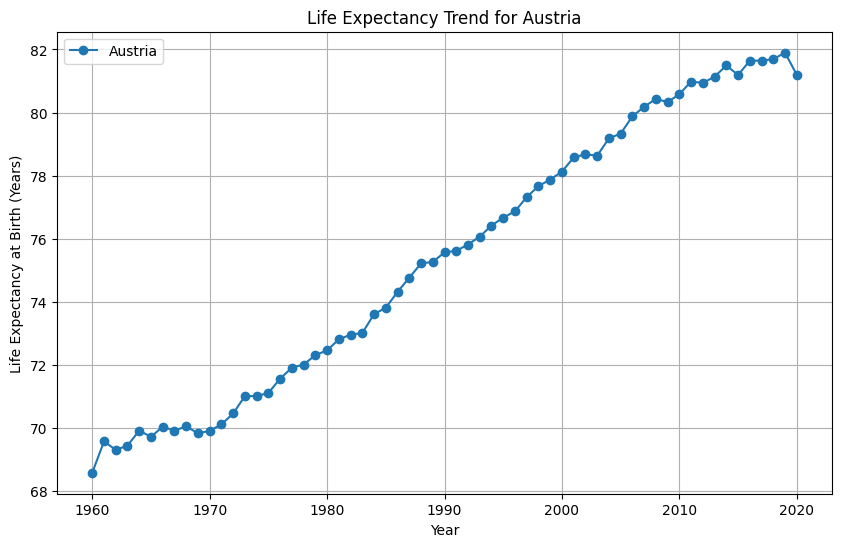

In [12]:
# Visualization Example: Life Expectancy Trend over Years for a Specific Entity
entity_name = "Austria"
entity_data = data[data['entity'] == entity_name]

if not entity_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(entity_data['year'], entity_data['life_expectancy_at_birth_total_(years)'], marker='o', label=entity_name)
    plt.title(f"Life Expectancy Trend for {entity_name}")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy at Birth (Years)")
    plt.legend()
    plt.grid(True)
    plt.savefig("../visuals/LifeExpectancy_Trend_Austria.png")
    print(f"Visualization saved as '../visuals/LifeExpectancy_Trend_Austria.png'")
    plt.show()
else:
    print(f"\nNo data found for the entity: {entity_name}")


Visualization saved as '../visuals/LifeExpectancy_Trend_Chile.png'


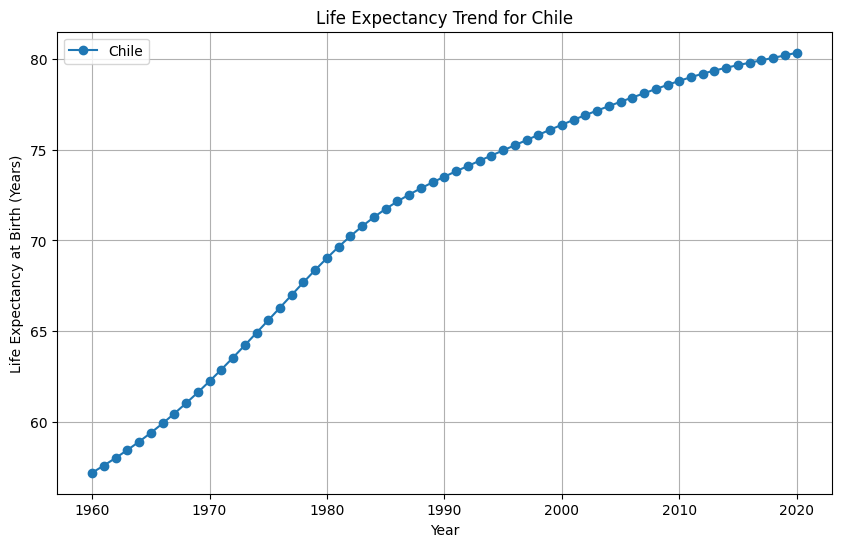

In [13]:
# Visualization Example: Life Expectancy Trend over Years for a Specific Entity
entity_name = "Chile"
entity_data = data[data['entity'] == entity_name]

if not entity_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(entity_data['year'], entity_data['life_expectancy_at_birth_total_(years)'], marker='o', label=entity_name)
    plt.title(f"Life Expectancy Trend for {entity_name}")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy at Birth (Years)")
    plt.legend()
    plt.grid(True)
    plt.savefig("../visuals/LifeExpectancy_Trend_Chile.png")
    print(f"Visualization saved as '../visuals/LifeExpectancy_Trend_Chile.png'")
    plt.show()
else:
    print(f"\nNo data found for the entity: {entity_name}")


In [14]:
print(data['entity'].unique())

['Abkhazia' 'Afghanistan' 'Africa' 'Akrotiri and Dhekelia' 'Albania'
 'Algeria' 'American Samoa' 'Andorra' 'Angola' 'Anguilla' 'Antarctica'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Asia' 'Australia'
 'Austria' 'Austria-Hungary' 'Azerbaijan' 'Baden' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Bavaria' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bermuda' 'Bhutan' 'Bolivia' 'Bonaire Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Bouvet Island' 'Brazil'
 'British Indian Ocean Territory' 'British Virgin Islands' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Christmas Island' 'Cocos Islands'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia' 'Czechoslovakia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Asia and Pacific' '

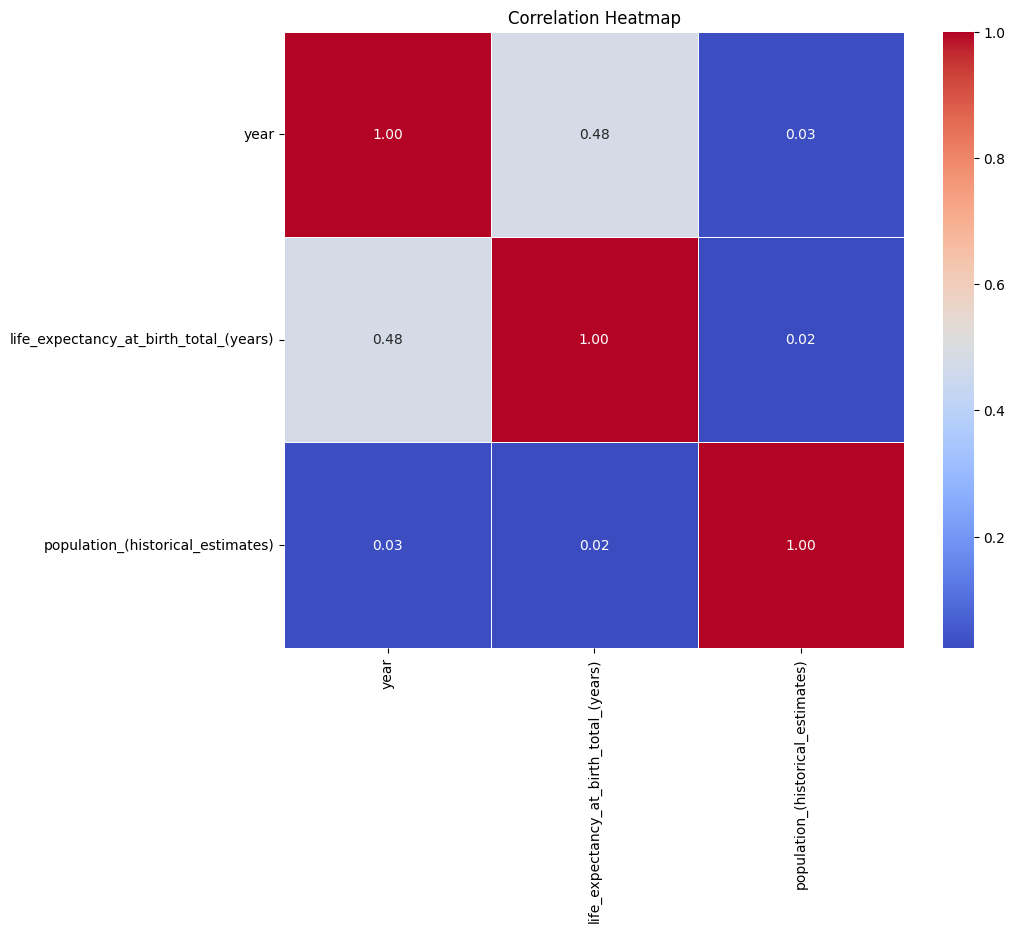

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# Automatically select numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns

# Clean the data: convert non-numeric entries in numeric columns to NaN
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Optionally, fill NaN values (e.g., with 0 or mean)
# data[numeric_columns] = data[numeric_columns].fillna(0)  # To fill with 0
# data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())  # To fill with column mean

# Compute the correlation matrix
correlation_matrix = data[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


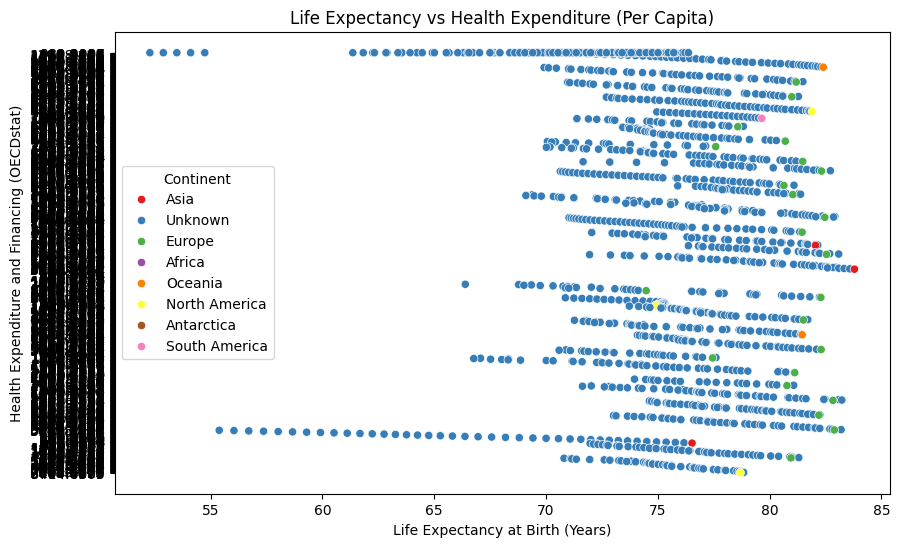

In [17]:
# Scatter plot of Life Expectancy vs Health Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='life_expectancy_at_birth_total_(years)', 
                y='health_expenditure_and_financing_(per_capita)_(oecdstat_(2017))', hue='continent', palette='Set1')
plt.title("Life Expectancy vs Health Expenditure (Per Capita)")
plt.xlabel("Life Expectancy at Birth (Years)")
plt.ylabel("Health Expenditure and Financing (OECDstat)")
plt.legend(title='Continent')
plt.show()


C:\Users\suhan\AppData\Local\Temp\ipykernel_4444\3659109507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='continent', y='life_expectancy_at_birth_total_(years)', palette='Set2')


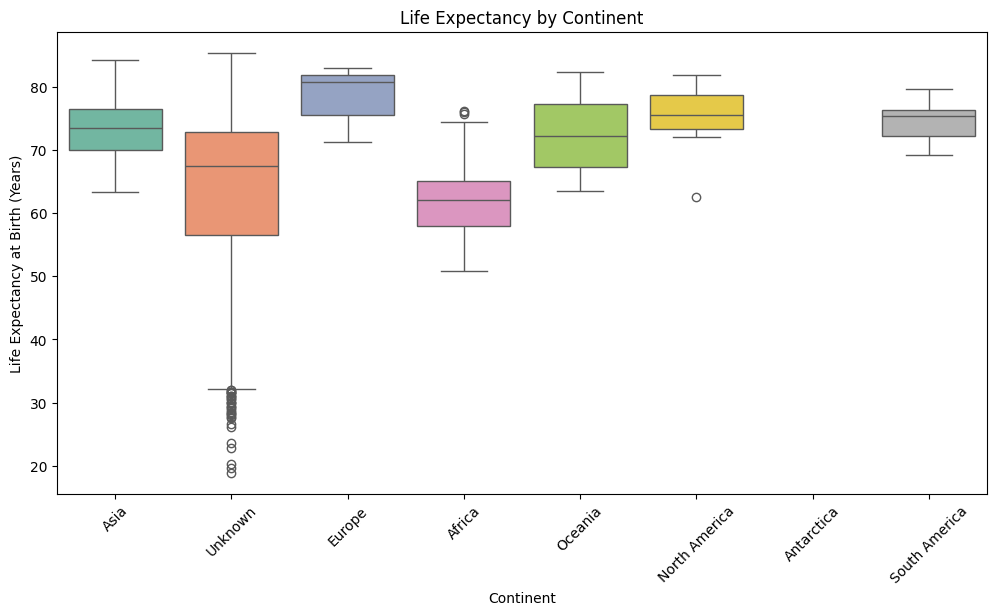

In [18]:
# Box plot of Life Expectancy by Continent
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='continent', y='life_expectancy_at_birth_total_(years)', palette='Set2')
plt.title("Life Expectancy by Continent")
plt.xlabel("Continent")
plt.ylabel("Life Expectancy at Birth (Years)")
plt.xticks(rotation=45)
plt.show()


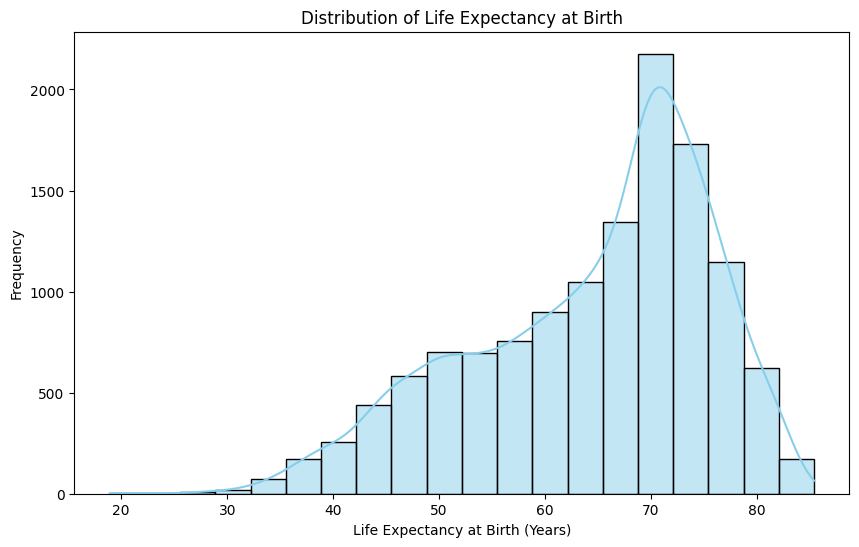

In [19]:
# Histogram for Life Expectancy at Birth
plt.figure(figsize=(10, 6))
sns.histplot(data['life_expectancy_at_birth_total_(years)'], kde=True, color='skyblue', bins=20)
plt.title("Distribution of Life Expectancy at Birth")
plt.xlabel("Life Expectancy at Birth (Years)")
plt.ylabel("Frequency")
plt.show()


In [20]:
# Statistical summary of all numeric columns
summary_statistics = data.describe()
print("Statistical Summary of Numeric Columns:")
print(summary_statistics)
output_file_path = "../output/summary_statistics.csv"
summary_statistics.to_csv(output_file_path)

output_file_path


Statistical Summary of Numeric Columns:
               year  life_expectancy_at_birth_total_(years)  \
count  56629.000000                            12845.000000   
mean    1610.541913                               64.459347   
std     1405.286305                               11.346860   
min   -10000.000000                               18.907000   
25%     1833.000000                               56.743320   
50%     1902.000000                               67.548759   
75%     1967.000000                               72.966003   
max     2021.000000                               85.387802   

       population_(historical_estimates)  
count                       5.565600e+04  
mean                        3.246352e+07  
std                         2.503028e+08  
min                         1.000000e+00  
25%                         1.338740e+05  
50%                         1.218570e+06  
75%                         5.396250e+06  
max                         7.874966e+09  


'../output/summary_statistics.csv'

In [24]:
# Recalculate the summary grouped by continent
continent_summary = data.groupby('continent')[['life_expectancy_at_birth_total_(years)', 
                                               'health_expenditure_and_financing_(per_capita)_(oecdstat_(2017))']].mean()

# Save the summary
output_file_path = "../output/continent_summary.csv"
continent_summary.to_csv(output_file_path, index=True)

print(f"Continent summary saved to {output_file_path}")



Continent summary saved to ../output/continent_summary.csv


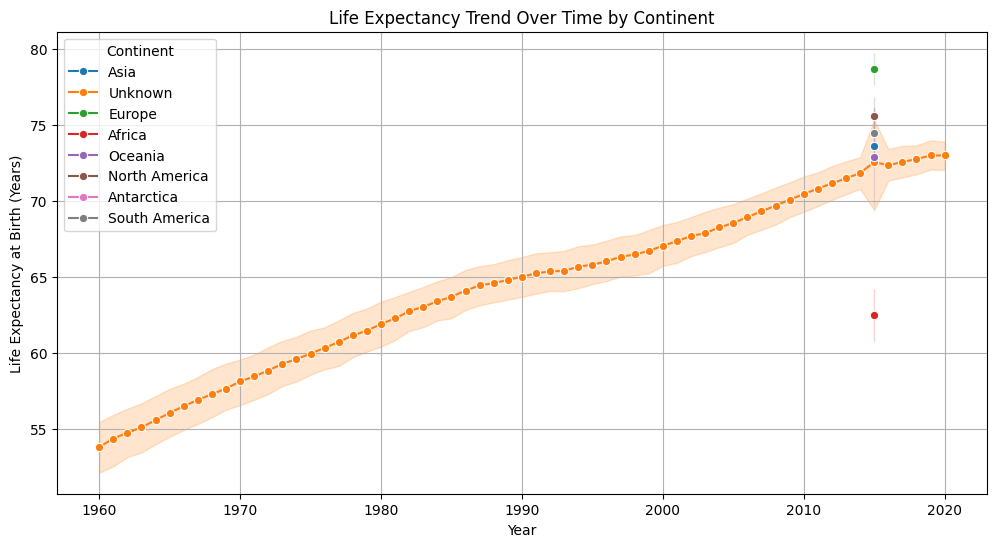

In [25]:
# Line plot for Life Expectancy over time, separated by continent
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='life_expectancy_at_birth_total_(years)', hue='continent', marker='o')
plt.title("Life Expectancy Trend Over Time by Continent")
plt.xlabel("Year")
plt.ylabel("Life Expectancy at Birth (Years)")
plt.legend(title='Continent')
plt.grid(True)
plt.show()


C:\Users\suhan\AppData\Local\Temp\ipykernel_4444\1576125839.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['life_expectancy_pct_change'] = data['life_expectancy_at_birth_total_(years)'].pct_change() * 100


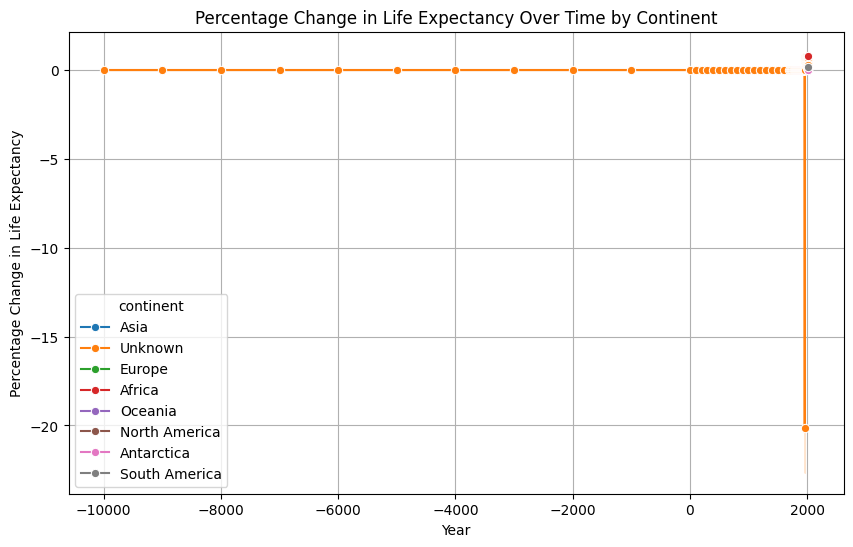

In [26]:
# Calculate percentage change in life expectancy over time
data['life_expectancy_pct_change'] = data['life_expectancy_at_birth_total_(years)'].pct_change() * 100

# Plot the percentage change in life expectancy over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='life_expectancy_pct_change', hue='continent', marker='o')
plt.title("Percentage Change in Life Expectancy Over Time by Continent")
plt.xlabel("Year")
plt.ylabel("Percentage Change in Life Expectancy")
plt.grid(True)
plt.show()
